In [1]:
import numpy as np

class MDP:
    def __init__(self, states, actions, transition_probs, rewards, gamma=0.9):
        """
        states: list of states
        actions: list of actions
        transition_probs: dict of transition probabilities, where the key is (state, action, next_state)
                          and the value is the probability of transitioning to next_state from state given action
        rewards: dict of rewards, where the key is (state, action, next_state) and the value is the reward
        gamma: discount factor
        """
        self.states = states
        self.actions = actions
        self.transition_probs = transition_probs
        self.rewards = rewards
        self.gamma = gamma

    def get_transition_prob(self, state, action, next_state):
        return self.transition_probs.get((state, action, next_state), 0)

    def get_reward(self, state, action, next_state):
        return self.rewards.get((state, action, next_state), 0)


In [2]:
def policy_evaluation(policy, mdp, theta=1e-6):
    """
    policy: dict mapping states to actions
    mdp: an MDP object
    theta: threshold for stopping evaluation (small value for convergence)
    """
    V = {state: 0 for state in mdp.states}  # Initialize value function for all states to 0

    while True:
        delta = 0  # To track convergence
        for state in mdp.states:
            v = V[state]  # Store current value
            action = policy[state]
            V[state] = sum(
                mdp.get_transition_prob(state, action, next_state) *
                (mdp.get_reward(state, action, next_state) + mdp.gamma * V[next_state])
                for next_state in mdp.states
            )
            delta = max(delta, abs(v - V[state]))  # Check the maximum change across all states

        if delta < theta:  # Stop if the value function change is less than the threshold
            break

    return V


In [6]:
def policy_improvement(V, mdp, policy):
    """
    V: state value function from policy evaluation
    mdp: an MDP object
    policy: current policy
    """
    policy_stable = True
    new_policy = {}

    for state in mdp.states:
        old_action = policy[state]
        action_values = {}
        for action in mdp.actions:
            action_values[action] = sum(
                mdp.get_transition_prob(state, action, next_state) *
                (mdp.get_reward(state, action, next_state) + mdp.gamma * V[next_state])
                for next_state in mdp.states
            )
        best_action = max(action_values, key=action_values.get)  # Choose the best action
        new_policy[state] = best_action
        if old_action != best_action:
            policy_stable = False

    return new_policy, policy_stable


In [7]:
def policy_iteration(mdp):
    """
    mdp: an MDP object
    """
    # Step 1: Initialize policy arbitrarily (we'll use the first action for all states)
    policy = {state: mdp.actions[0] for state in mdp.states}

    while True:
        # Step 2: Policy Evaluation
        V = policy_evaluation(policy, mdp)

        # Step 3: Policy Improvement
        policy, policy_stable = policy_improvement(V, mdp, policy)

        # Step 4: Check if the policy is stable (i.e., if no action changes)
        if policy_stable:
            break

    return policy, V


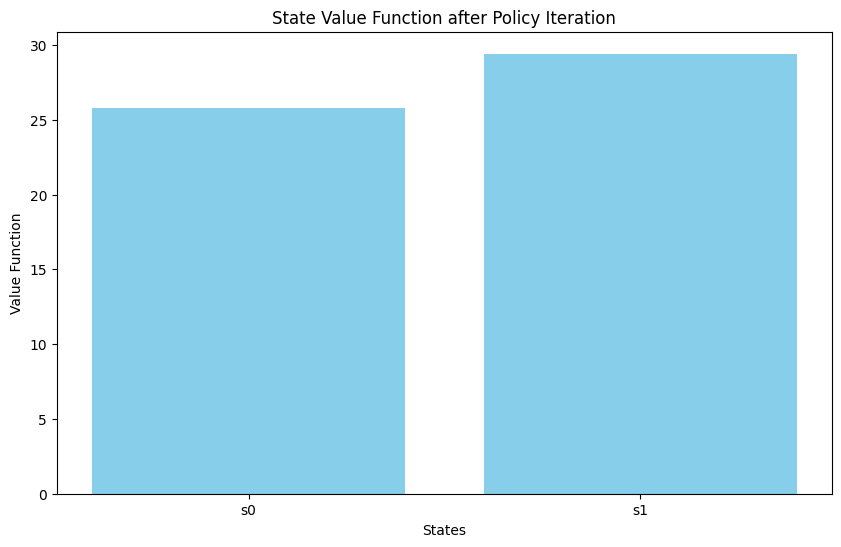

In [9]:
import matplotlib.pyplot as plt

def plot_value_function(V):
    """
    Plots the state value function.
    V: The state value function as a dictionary {state: value}
    """
    states = list(V.keys())
    values = list(V.values())

    plt.figure(figsize=(10, 6))
    plt.bar(states, values, color='skyblue')
    plt.xlabel('States')
    plt.ylabel('Value Function')
    plt.title('State Value Function after Policy Iteration')
    plt.show()

# Example usage: After policy iteration, plot the value function
optimal_policy, optimal_value_function = policy_iteration(mdp)
plot_value_function(optimal_value_function)
